사용할 공식

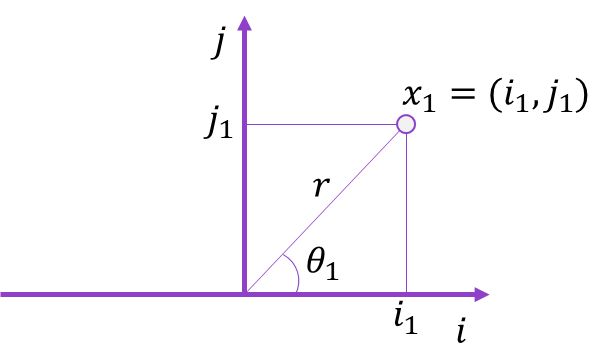

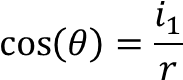

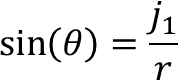

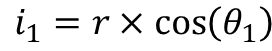

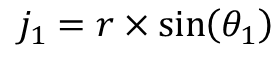

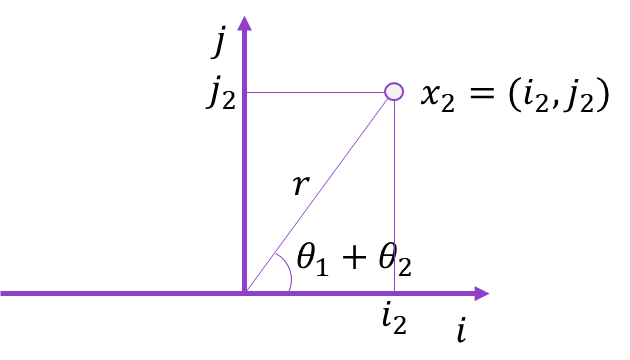

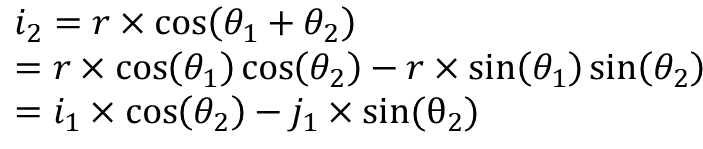

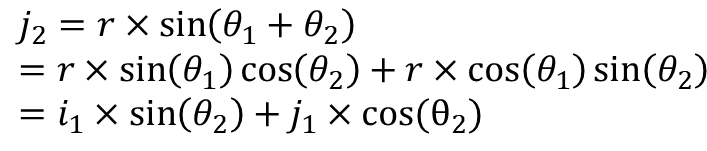




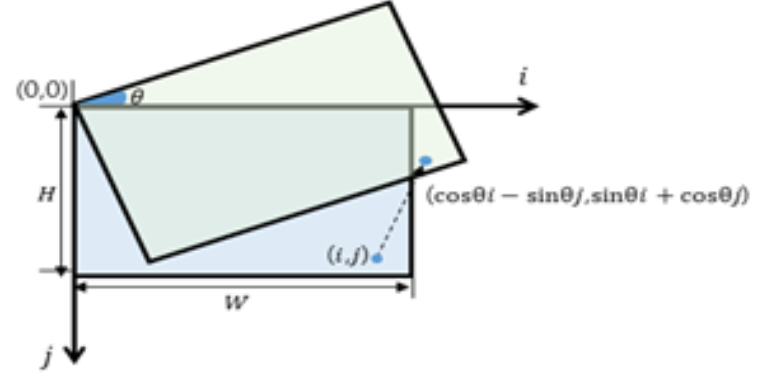

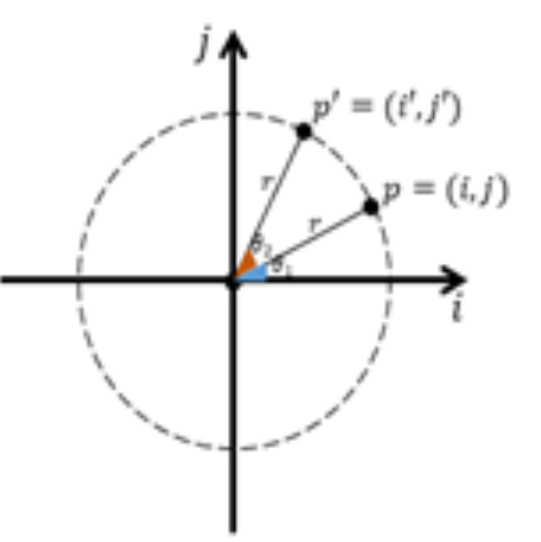

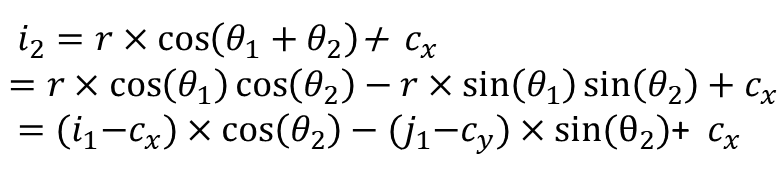

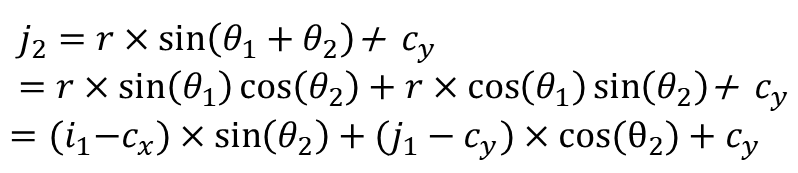

최종적으로 이공식만 사용

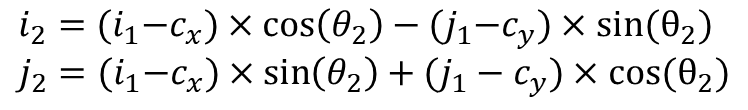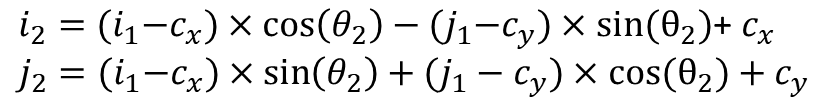

i1=원본 점의 x좌표, j1 =원본 점의 y좌표

c1=중앙 점의 x좌표, c2 =중앙 점의 x좌표

In [17]:
#필수 모듈 로딩
import cv2 #open cv 모듈 #open cv는 numpy의 자료형을 다룸
from google.colab import files #코랩에서 파일불러오기위한 모듈
from google.colab.patches import cv2_imshow #코랩에서 내놓은 cv호환패치 모듈
import numpy as np
import math

In [18]:
#파일 업로드
file1 = files.upload()

Saving smile.png to smile (1).png


(191, 247, 3)


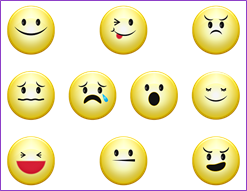

In [19]:
#불러온 파일 넘파이로 가공할 수 있게 변형
img1 = cv2.imread("smile.png") 
print(img1.shape) #shape로 정보 출력 (가로,세로,채널) -> 이미지가 가진 정보의 행렬의 크기를 알 수 있음
cv2_imshow(img1) 
#넘파이 np.zeros(shape,dtype,order) opencv에서 쓰는 자료타입만들기 b g r 순서로 색정보가 배열되어있음 
height, width, channel = img1.shape

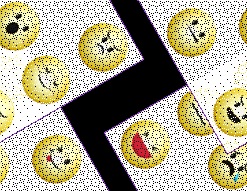

In [20]:
#1차시도
각도1=60
r_각도1=math.radians(각도1)

rotated1_img=np.zeros(shape=(height,width,channel), dtype=np.uint8)
cx=int(width/2)
cy=int(height/2)
#x2=(x1-cx)*cos(r_각도)-(y1-cy)*sin(r_각도)
#y2=(x1-cx)*sin(r_각도)+(y1-cy)*cos(r_각도)
for y in range(height):
  for x in range(width):
    y2=(x-cx)*math.sin(r_각도1)+(y-cy)*math.cos(r_각도1)
    x2=(x-cx)*math.cos(r_각도1)-(y-cy)*math.sin(r_각도1)
    rotated1_img[int(y2)][int(x2)]=img1[y][x]
cv2_imshow(rotated1_img)

#60도로 회전은 됐으나 뭔가 창의적으로 배치되는 방식으로 출력

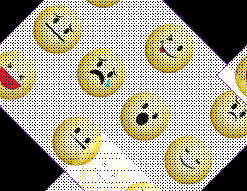

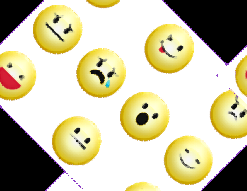

In [36]:
#1차시도에 받았던 공식에 문제가 있었음
#x2=(x1-cx)*cos(r_각도)-(y1-cy)*sin(r_각도)+cx
#y2=(x1-cx)*sin(r_각도)+(y1-cy)*cos(r_각도)+cy 가 바른 공식

#1차시도 변형a
각도1a=45
r_각도1a=math.radians(각도1a)

rotated1a_img=np.zeros(shape=(height,width,channel), dtype=np.uint8)
cx=int(width/2)
cy=int(height/2)

for y in range(height):
  for x in range(width):
    y2=(x-cx)*math.sin(r_각도1a)+(y-cy)*math.cos(r_각도1a)+cy
    x2=(x-cx)*math.cos(r_각도1a)-(y-cy)*math.sin(r_각도1a)+cx
    if int(y2)<height:
      if int(x2)<width:
        rotated1a_img[int(y2)][int(x2)]=img1[y][x]

cv2_imshow(rotated1a_img)
#소수점단위로 계산되서 정수인부분이 비어버려서 구멍난채로 출력
#블러처리로 그걸 보정할 수 있다.
rotated1a_img=cv2.medianBlur(rotated1a_img,3)
cv2_imshow(rotated1a_img)
#회전은 맞게 되나 잘린부분이 겹쳐서 나옴

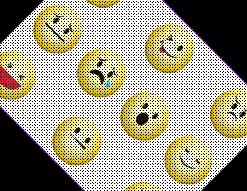

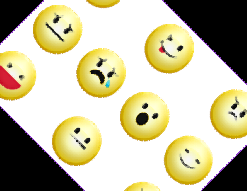

In [35]:
#1차시도 변형b
#겹치는 부분을 해결하기 위해 x,y값 지정이 추가로 필요
#1차시도 변형
각도1b=45
r_각도1b=math.radians(각도1b)

rotated1a_img=np.zeros(shape=(height,width,channel), dtype=np.uint8)
cx=int(width/2)
cy=int(height/2)

for y in range(height):
  for x in range(width):
    y2=(x-cx)*math.sin(r_각도1b)+(y-cy)*math.cos(r_각도1b)+cy
    x2=(x-cx)*math.cos(r_각도1b)-(y-cy)*math.sin(r_각도1b)+cx
    if x2>=0 and int(y2)<height: #0보다 작을때는 빼줘야 잘리는 부분 겹치지 않음
      if int(x2)<width and y2>=0: #0보다 작을때는 빼줘야 잘리는 부분 겹치지 않음
        rotated1a_img[int(y2)][int(x2)]=img1[y][x]

cv2_imshow(rotated1a_img)
#소수점단위로 계산되서 정수인부분이 비어버려서 구멍난채로 출력
#블러처리로 그걸 보정할 수 있다.
rotated1a_img=cv2.medianBlur(rotated1a_img,3)
cv2_imshow(rotated1a_img)


In [21]:
#2차시도
#1차시도에선 y,x 좌표를 원본거로 두고 함수를 복사할곳으로 바꿔서 그런것으로 추정 #수식이 틀렸던거 였음
#수식을 바꿔 y,x 좌표를 복사할거로 고정하고 원본 좌표에 함수 적용 #이방법으로 하면 블러처리 안해도 될것으로 기대되니 가치는 있음
#수식 변형과정중 좀 꼬여서 시간걸림
각도2=60
r_각도2=math.radians(각도2)

rotated2_img=np.zeros(shape=(height,width,channel), dtype=np.uint8)
cx=int(width/2)
cy=int(height/2)
#x1={x2+(y1-cy)*sin(r_각도)}/cos(r_각도)+cx
#y1={y2-(x1-cx)*sin(r_각도)}/cos(r_각도)+cy #변형공식을 만들어 하나의 변수에 대한 공식으로 정리할 필요가 있음
for y in range(height):
  for x in range(width):
    _cos=math.cos(r_각도2)
    _sin=math.sin(r_각도2)
    y1=(1/_cos)*(y2-(((1/_cos)*(x-cy*_sin)))+cx)-cx
    x1={x+(y1-cy)*math.sin(r_각도2)}/math.cos(r_각도2)+cx
    rotated2_img[y][x]=img1[int(y1)][int(x1)]
cv2_imshow(rotated2_img)


TypeError: ignored

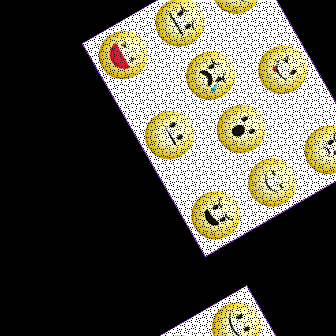

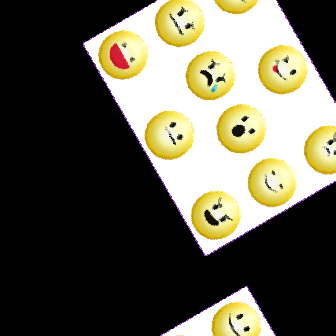

In [79]:
#2차시도는 나중에 함수 좀 더 다듬고 1차시도변형b에서 잘린부분 나오게 하는 방법 시도
#1차시도 변형c
각도1c=60
r_각도1c=math.radians(각도1c)

cx=int(width/2)
cy=int(height/2)
edgepoint=[0,(width-1),(height-1)]
resultx=[]
resulty=[]
for y in edgepoint:
  for x in edgepoint:
    y2=(x-cx)*math.sin(r_각도1c)+(y-cy)*math.cos(r_각도1c)+cy
    x2=(x-cx)*math.cos(r_각도1c)-(y-cy)*math.sin(r_각도1c)+cx
    resulty.append(y2)
    resultx.append(x2)
resulty.sort()
resultx.sort()
r_height=int(resulty[len(resulty)-1]-resulty[0])
r_width=int(resultx[len(resultx)-1]-resultx[0])
cx=int(r_width/2)
cy=int(r_height/2)

rotated1c_img=np.zeros(shape=(r_height,r_width,channel), dtype=np.uint8)    

for y in range(height):
  for x in range(width):
    y2=(x-cx)*math.sin(r_각도1c)+(y-cy)*math.cos(r_각도1c)+cy
    x2=(x-cx)*math.cos(r_각도1c)-(y-cy)*math.sin(r_각도1c)+cx
    if int(y2)<r_height:
      if int(x2)<r_width:
        rotated1c_img[int(y2)][int(x2)]=img1[y][x]

cv2_imshow(rotated1c_img)
#소수점단위로 계산되서 정수인부분이 비어버려서 구멍난채로 출력
#블러처리로 그걸 보정할 수 있다.
rotated1c_img=cv2.medianBlur(rotated1c_img,3)
cv2_imshow(rotated1c_img)

#모든 부분 나오게는 만들었으나 배치는 이상함
#중앙값 설정하는게 중요할듯